Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

# Strojno učenje

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

Ak. god. 2015./2016.

# Bilježnica 8: Stroj potpornih vektora (SVM)

(c) 2015 Jan Šnajder

<i>Verzija: 0.1 (2015-12-08)</i>

In [8]:
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Sadržaj:

* Uvod

* Problem maksimalne margine

* Optimizacija uz ograničenja

* Metoda Lagrangeovih multiplikatora

* Dualna formulacija problema maksimalne margine

* Meka margina

* Gubitak zglobnice

* Jezgreni trik

* Mercerove jezgre

* Optimizacija hiperparametara


# Uvod


* Vrlo učinkovit **diskriminativan model**


* Podsjetnik: Algoritam strojnog učenja definiran je 
  1. modelom
  * pogreškom
  * optimizacijskim postupkom
    
    
* Model:
    
$$
    h(\mathbf{x}) = \mathbf{w}^\intercal\boldsymbol{\phi}(\mathbf{x})
$$


* Dakle, to je poopćeni linearan model bez funkcije preslikavanja


* Gornja definicija modela je tzv. **primarna formulacija**


* Postoji i **dualna formulacija**:
  * Umjesto da značajke novog primjera množimo težinama $\mathbf{w}$, možemo za novi primjer izračunati koliko je sličan primjerima iz skupa za učenje i na temelju toga odrediti klasifikaciju
  * Model efektivno postaje **neparametarski**!
  
  
* U dualnoj formulaciji možemo iskoristiti tzv. **jezgreni trik**, koji nam omogućava jeftino preslikavanje primjera u prostor više dimenzije (a time i nelinearnost modela)
  * SVM je jedna vrsta tzv. **jezgrenog stroja** (engl. *kernel machine*)


* Model je jednostavan, no definicija pogreške i optimizacijskog postupka su nešto složeniji


* Osnovna ideja: primjere dviju klasa razdvojiti tako da je prostor između njih što veći $\Rightarrow$ tzv. **maksimalna margina**


* Opravdanje: generalizacija će biti najbolja onda kada granicu između klasa povućemo točno po sredini margine


* Do sada smo optimizacijski problem definirali tako da smo
  * krenuli od log-izglednosti pa izveli MLE (Naivan bayes)
  * krenuli od funkcije gubitka pa izveli funkciju pogreške (linearna regresija) i napravili analitičku minimizaciju
  * krenuli od funkcije pogreške pa izveli funkciju gubitka (logistička regresija, perceptron) i iskoristili je za gradijentni spust
  
  
* Kod SVM-a, krenut ćemo odmah od onoga što u konačnici želimo dobiti: maksimalnu marginu $\Rightarrow$ to je ono što SVM optimizira


* Ići ćemo "klasičnim pristupom": formalizirati to kao problem **kvadratnog programiranja**


* Naknadno ćemo iz toga izvesti funkciju gubitka (i funkciju pogreške), ali samo radi usporedbe s drugim algoritmima


> **Sinopsis:**
> 
> * Prvo ćemo se fokusirati na **linearan model** i **linearno odvojive probleme** (tvrda granica)
  * Matematika: Lagrangeovi multiplikatori
> 
> * Zatim ćemo proširiti **linearan model** tako da može raditi s **linearno neodvojivim problemima** (meka granica)
> 
> * Na kraju ćemo proširiti na **nelinearan model** (jezgreni trik)
>   * Matematika: Mercerove jezgre

# Problem maksimalne margine

* Model:
$$
h(\mathbf{x}) = \mathbf{w}^\intercal x + w_0
$$


* Oznake primjera za učenje: $y\in\{-1,+1\}$


* Granica između klasa: hiperravnina $h(\mathbf{x})=0$


* Predikcija klase: $y=\mathrm{sgn}(h(\mathbf{x}))$


* Pretpostavimo da su primjeri iz $\mathcal{D}$ **linearno odvojivi**


* Onda postoji $\mathbf{w}$ i $w_0$ takvi da
$$
\begin{align*}
h(\mathbf{x}^{(i)}) \geq 0 & \quad\text{za svaki $y^{(i)}=+1$}\\
h(\mathbf{x}^{(i)}) < 0 & \quad\text{za svaki $y^{(i)}=-1$}\\
\end{align*}
$$


* Kraće, postoje $\mathbf{w}$ i $w_0$ takvi da
$$
\forall(\mathbf{x}^{(i)},y^{(i)}) \in \mathcal{D}.\ y^{(i)}h(\mathbf{x}^{(i)})\geq 0
$$


* Postoji beskonačno mnogo rješenja za $\mathbf{w}$ i $w_0$ (prostor inačica je beskonačan)


* No nas zanima rješenje **maksimalne margine** $\Rightarrow$ induktivna pristranost preferencijom


* **Margina = udaljenost hiperravnine do najbližeg primjera**


* Ako maksimiziramo marginu, onda će hiperravnina prolaziti točno na pola puta između dva primjera


#### Formulacija optimizacijskog problema


* Predznačena udaljenost primjera od hiperravnine je

$$
d = \frac{h(\mathbf{x})}{\|\mathbf{w}\|}
$$


* Nas zanimaju samo hiperravnine koje ispravno klasificiraju primjere. U tom slučaju **apsolutna** udaljenost primjera do hiperravnine je:

$$
\frac{y^{(i)}h(\mathbf{x})}{\|\mathbf{w}\|} = 
\frac{y^{(i)}(\mathbf{w}^\intercal\mathbf{x}^{(i)}+w_0)}{\|\mathbf{w}\|}
$$


* Po definiciji, margina je udaljenost hiperravnine do najbližeg primjera:

$$
\frac{1}{\|\mathbf{w}\|}\mathrm{min}_i\big\{y^{(i)}(\mathbf{w}^\intercal\mathbf{x} + w_0)\big\}
$$


* Tu udaljenost želimo maksimizirati:

$$
\mathrm{argmax}_{\mathbf{w},w_0}\Big\{\frac{1}{\|\mathbf{w}\|}\mathrm{min}_i\big\{y^{(i)}(\mathbf{w}^\intercal\mathbf{x} + w_0)\big\}\Big\}
$$


* Ako je $\mathcal{D}$ linearno odvojiv, onda postoji samo jedna takva margina

#### Pojednostavljenje optimizacijskog problema


* Gornji problem teško je riješiti izravno (min unutar max)


* Vektor $(\mathbf{w},w_0)$ možemo pomnožiti s proizvoljnom konstantom, a da to ne utječe na udaljenosti između primjera i hiperravnine:

$$
d=\frac{h(\mathbf{x})}{\|\mathbf{w}\|}=
\frac{\color{red}{\alpha}\mathbf{w}^\intercal\mathbf{x}+\color{red}{\alpha}w_0}{\|\color{red}{\alpha}\mathbf{w}\|}=
\frac{\color{red}{\alpha}(\mathbf{w}^\intercal\mathbf{x}+w_0)}{\color{red}{\alpha}\|\mathbf{w}\|}=
\frac{\mathbf{w}^\intercal\mathbf{x}+w_0}{\|\mathbf{w}\|}
$$


* Kako bismo pojednostavili problem, možemo definirati da za primjer $\mathbf{x}^{(i)}$ koji je najbliži margini vrijedi

$$
y^{(i)}(\mathbf{w}^\intercal\mathbf{x}+w_0)=1
$$


* Svi ostali primjeri jednako su blizu margine ili su od nje još udaljeniji:

$$
y^{(i)}(\mathbf{w}^\intercal\mathbf{x}+w_0) \geq 1, \qquad n=1,\dots,N
$$


* Za primjere za koje $y^{(i)}h(\mathbf{x})=1$ kažemo da su ograničenja **aktivna**, dok su za ostale primjere ograničenja neaktivna 
  * (Primjeri za koje su ograničenja aktivna zovemo potpornim vektorima, ali o tome više kasnije)


* Uvijek će postojati barem **dva** aktivna ograničenja


* [Skica: maksimalna margina]


* Dakle, umjesto
$$
\mathrm{argmax}_{\mathbf{w},w_0}\Big\{\frac{1}{\|\mathbf{w}\|}\underbrace{\mathrm{min}_i\big\{y^{(i)}(\mathbf{w}^\intercal\mathbf{x} + w_0)\big\}}_{=1}\Big\}
$$
mi sada maksimiziramo
$$
\mathrm{argmax}_{\mathbf{w},w_0}\frac{1}{\|\mathbf{w}\|}
$$
uz ograničenja
$$
y^{(i)}(\mathbf{w}^\intercal\mathbf{x}+w_0) \geq 1, \qquad n=1,\dots,N
$$


* Maksimizator od $\frac{1}{\|\mathbf{w}\|}$ ekvivalentan je minimizatoru od $\|\mathbf{w}\|=\sqrt{\mathbf{w}^\intercal\mathbf{w}}$, a taj je ekvivalentan minimizatoru od $\|\mathbf{w}\|^2$. Još ćemo pomnožiti s $\frac{1}{2}$ radi kasnije matematičke jednostavnosti


* Konačna formulacija optimizacijskog problema maksimalne margine:

> $\mathrm{argmin}_{\mathbf{w},w_0}\frac{1}{2}\|\mathbf{w}\|^2$

> tako da $\quad y^{(i)}(\mathbf{w}^\intercal\mathbf{x}+w_0) \geq 1, \quad n=1,\dots,N$


* Naš optimizacijski problem sveo se na ciljnu funkciju koju želimo optimirati i ograničenja koja pritom moramo poštovati: tipičan problem **konveksne optimizacije uz ograničenja**, točnije **kvadratnog programiranja**
  * "Programiranje" = matematičko programiranje = (matematička) optimizacija

# Optimizacija uz ograničenja


* Optimizacijski problem $\Rightarrow$ Optimizacija uz ograničenja $\Rightarrow$ Konveksni optimizacijski problem $\Rightarrow$ Kvadratno programiranje


* Optimizacijski problem uz ograničenja (standardni oblik):

$$
\begin{align*}
\text{minimizirati} &\quad f(\mathbf{x})\\
\text{uz ograničenja} &\quad g_i(\mathbf{x})\leq0,\quad i=1,\dots,m\\
&\quad h_i(\mathbf{x}) = 0,\quad i=1,\dots,p
\end{align*}
$$


* $f : \mathbb{R}^n\to\mathbb{R}$ je **ciljna funkcija** (engl. *objective function*
* $h_i : \mathbb{R}^n\to\mathbb{R}$ su **ograničenja
jednakosti** (engl. *equality constraints*)
* $g_i:\mathbb{R}^n\to\mathbb{R}$ su **ograničenja nejednakosti** (engl. *inequality constraints*)


* **NB:** Sva ograničenja (ne)jednakosti mogu se se svesti na standardni oblik


* Tražimo minimum koji zadovoljava sva ograničenja
* Točke koje zadovoljavaju rješenja zovemo **ostvarivim
točkama** (engl. *feasible points*)


* Konveksni optimizacijski problem:

$$
\begin{align*}
\text{minimizirati} &\quad f(\mathbf{x})\ \color{red}{\text{$\Rightarrow$ konveksna}}\\
\text{uz ograničenja} &\quad g_i(\mathbf{x})\leq0,\quad i=1,\dots,m\\
&\quad \mathbf{a}_i^\intercal\mathbf{x} - b_i = 0,\quad i=1,\dots,p
\end{align*}
$$

* Kvadratni program:

$$
\begin{align*}
\text{minimizirati} &\quad \frac{1}{2}\mathbf{x}^\intercal P\mathbf{x} + \mathbf{q}^\intercal\mathbf{x} + r\ \color{red} {\text{$\Rightarrow$ kvadratna funkcija}}\\
\text{uz ograničenja} &\quad G\mathbf{x}\leq\mathbf{h}\\
&\quad A\mathbf{x}=\mathbf{b}\\
\end{align*}
$$

# Metoda Lagrangeovih multiplikatora

* Kvadratni program može se riješiti metodom **Langrangeovih multiplikatora**
  * Točnije: **proširen Lagrangeov postupak** (engl. *augmented Lagrangian method*), jer imamo ograničenja nejednakosti (izvorna metoda dopušta samo ograničenja jednakosti)


* Lagrangeovi multiplikatori mogu se koristiti općenito za optimizaciju s ograničenjima (problem ne mora biti konveksan)


* Pripada skupini **metoda s kaznom** (engl. *penalty methods*)


* Ideja: umjesto ograničenog problema, riješiti niz neograničenih problema koji uključuju kaznu za kršenje ograničenja


* Alternativa: **metode unutarnje točke** (engl. *interior-point methods*, *barrier methods*)

#### Lagrangeova funkcija

* **Lagrangeova funkcija** izravno ugrađuje ograničenja u ciljnu funkciju


* [Skica ideje]


* Početni problem:

\begin{align*}
\text{minimizirati} &\quad f(\mathbf{x})\\
\text{uz ograničenja} &\quad g_i(\mathbf{x})\leq0,\quad i=1,\dots,m\\
 &\quad h_i(\mathbf{x}) = 0,\quad i=1,\dots,p
\end{align*}


* Lagrangeova funkcija:

$$
\begin{equation}
L(\mathbf{x},\color{red}{\boldsymbol\alpha},\color{red}{\boldsymbol\beta}) = f(\mathbf{x}) + \sum_{i=1}^m\color{red}{\alpha_i} g(\mathbf{x}) + \sum_{i=1}^p\color{red}{\beta_i}
h(\mathbf{x})
\end{equation}
$$

* Dobili smo neograničeni problem optimizacije: optimum Lagrangeove funkcije odgovara optimimu odgovarajućeg problema s ograničenjim


* Vrijednosti $\alpha_i$ i $\beta_i$ su **Lagrangeovi multiplikatori** (množitelji) za ograničenja nejednakosti odnosno jednakosti


* Za vrijednosti $\alpha_i$ vrijede takozvani **Karush-Kuhn-Tuckerovi (KKT)** uvjeti:

$$
\begin{align}
\alpha_i &\geq 0,\quad i=1,\dots,p\\
\alpha_i g_i(\mathbf{x}) &= 0,\quad i=1,\dots,p
\end{align}
$$


#### Lagrangeova dualnost


* Načelo dualnosti u teoriji optimizacije:
  * **Primarni problem** (engl. *primal problem*): minimizacija funkcije $f(\mathbf{x})$
  * **Dualni problem**: nalaženje donje granice primarnog problema ("minumum ne može biti manji od $\mathbf{x}$")


* [Skica: primal-dual sedlo]


* Općenito, rješenja primarnog i dualnog problema se ne preklapaju već postoji **dualni procjep**


* Uz određene uvjete, kod konveksne optimizacije dualni procjep jednak je nuli $\Rightarrow$ **jaka dualnost**


* To znači da je rješenje dualnog problema ujedno i rješenje primarnog problema


* Dakle, ako nam je tako pogodnije, možemo rješavati dualni problem umjesto primarnog


* U nastavku promatramo Lagrangeovu dualnost


* Lagrangeova funkcija (NSO: samo s ograničenjima jednakosti):

$$
L(\mathbf{x},\boldsymbol\alpha) = f(\mathbf{x}) + \sum_i\alpha_i g_i(\mathbf{x})
$$


* To je fukcija od $\mathbf{x}$ (**primarne varijable**) i $\boldsymbol\alpha$ (**dualne varijable**)


* Optimum:
$$
L(\mathbf{x}^*,\boldsymbol\alpha^*) = \min_{\mathbf{x},\boldsymbol\alpha} L(\mathbf{x},\boldsymbol\alpha)
$$


* Vrijednost za $\mathbf{x}^*$ nalazimo rješavanjem sustava:

$$
\begin{equation}
\nabla f(\mathbf{x}) + \nabla \sum_i\alpha_i h_i(\mathbf{x}) = 0
\end{equation}
$$


* To rješenje ne mora dovesti do uklanjanja dualnih varijabli! Općenito, dobit ćemo rješenje koje mimizira $\mathbf{x}$ za neki zadani $\boldsymbol\alpha$:
$$
\tilde{L}(\boldsymbol\alpha)= \min_{\mathbf{x}}L(\mathbf{x},\boldsymbol\alpha) = \min_{\mathbf{x}}\Big(f(\mathbf{x}) + \sum_i
\alpha_i g(\mathbf{x})\Big)
$$
$\Rightarrow$ **Dualna Lagrangeova funkcija**


* Sigurno vrijedi:
$$
\tilde{L}(\boldsymbol\alpha) \leq L(\mathbf{x}^*,\boldsymbol\alpha)
$$
$\Rightarrow$ Dualna Lagrangeova funkcija je **donja ograda** primarnog problema


* U točki $\boldsymbol\alpha^*$ vrijedi $\tilde{L}(\boldsymbol\alpha^*)=L(\mathbf{x}^*,\boldsymbol\alpha^*)$


* Kako bismo pronašli $\boldsymbol\alpha^*$, moramo maksimizirati
donju ogradu, tj. riješiti sljedeći konveksni problem:

$$
\begin{align*}
\text{maksimizirati} &\quad \tilde{L}(\boldsymbol\alpha)\\
\text{uz ograničenja} &\quad \alpha_i\geq 0,\quad i=1,\dots,m
\end{align*}
$$


* **NB:** minimizacija ciljne funkcije $\Leftrightarrow$ maksimizacija dualne funkcije

# Dualna formulacija problema maksimalne margine


* Optimizacijski problem maksimalne margine:

> $\mathrm{argmin}_{\mathbf{w},w_0}\frac{1}{2}\|\mathbf{w}\|^2$

> tako da $\quad y^{(i)}(\mathbf{w}^\intercal\mathbf{x}+w_0) \geq 1, \quad n=1,\dots,N$


* Odgovarajuća Lagrangeova funkcija:

$$
L(\mathbf{w},w_0,\color{red}{\boldsymbol\alpha})=\frac{1}{2}\|\mathbf{w}\|^2 -
\sum_{i=1}^N\color{red}{\alpha_i}\Big\{y^{(i)}\big(\mathbf{w}^\intercal\mathbf{x}^{(i)}+w_0\big)-1\Big\}
$$


*  $\color{red}{\boldsymbol\alpha=(\alpha_1,\dots,\alpha_N)}$ je vektor Lagrangeovih multiplikatora, po jedan za svako ograničenje


* Prelazimo na **dualnu formulaciju** problema jer je ta formulacija jednostavnija (optimirat ćemo samo po $\boldsymbol\alpha$, a postoje i neke druge prednosti)


* Minimizator $(\mathbf{w}^*, w_0^*)$: deriviranje po $\mathbf{w}$ odnosno $w_0$ i izjednačavanje s nulom:
$$
\begin{align}
\mathbf{w} &= \sum_{i=1}^N \alpha_i y^{(i)}\mathbf{x}^{(i)}\\
0 &= \sum_{i=1}^N\alpha_i y^{(i)}
\end{align}
$$


* Dualna Lagrangeova funkcija:

$$
\begin{align*}
\tilde{L}(\boldsymbol\alpha) &=
\frac{1}{2}\|\mathbf{w}\|^2 -\sum_{i=1}^N\alpha_i\Big\{y^{(i)}\big(\mathbf{w}^\intercal\mathbf{x}^{(i)}+w_0\big)-1\Big\}\\
&= 
\frac{1}{2}\|\mathbf{w}\|^2
-\sum_{i=1}^N\alpha_i y^{(i)}\mathbf{w}^\intercal\mathbf{x}^{(i)}
\color{gray}{\underbrace{-w_0 \sum_{i=1}^N\alpha_iy^{(i)}}_{=0}} + 
\sum_{i=1}^N\alpha_i\\
&= \nonumber
\frac{1}{2}\sum_{i=1}^N\alpha_i y^{(i)}(\mathbf{x}^{(i)})^\intercal\sum_{j=1}^N\alpha_j y^{(j)}\mathbf{x}^{(j)}
-
\sum_{i=1}^N\alpha_i y^{(i)}(\mathbf{x}^{(i)})^\intercal\sum_{j=1}^N\alpha_j y^{(j)}\mathbf{x}^{(j)}
+ \sum_{i=1}^N\alpha_i\\
&= 
\sum_{i=1}^N\alpha_i - 
\frac{1}{2}\sum_{i=1}^N
\sum_{j=1}^N
\alpha_i
\alpha_j
y^{(i)}
y^{(j)}
(\mathbf{x}^{(i)})^\intercal
\mathbf{x}^{(j)}
\end{align*}
$$

* Dobili smo **dualni optimizacijski problem**:

> **Maksimizirati** izraz
> \begin{align}
 \sum_{i=1}^N\alpha_i - 
 \frac{1}{2}\sum_{i=1}^N
 \sum_{j=1}^N
 \alpha_i
 \alpha_j
 y^{(i)}
 y^{(j)}
 (\mathbf{x}^{(i)})^\intercal
 \mathbf{x}^{(j)}
 \end{align}
> tako da:
> \begin{align*}
 \alpha_i &\geq 0,\quad i=1,\dots,N \\ 
 \sum_{i=1}^N\alpha_i y^{(i)} &= 0
 \end{align*}

* Također vrijedi KKT-uvjet:
$$
\alpha_i\big(y^{(i)} h(\mathbf{x}^{(i)})-1\big) = 0
$$


* Ovo je i dalje problem kvadratnog programiranja, međutim broj varijabli se promijenio
  * Primarni problem: $n+1$ varijabli
  * Dualni problem: $N$ varijabli
  
  
* Dakle, prijelaz u dualni problem se računalno isplati ako $N\ll n$
  
  
* Općenito, složenost kvadratnog programiranja od $n$ varijabli je $\mathcal{O}(n^3)$
  * Posebni algoritmi su efikasniji: **slijedna minimalna optimizacija (SMO)** ima $\mathcal{O}(n^2)$

#### Model

* Već smo izračunali:
$$
\begin{align}
\mathbf{w} &= \sum_{i=1}^N \alpha_i y^{(i)}\mathbf{x}^{(i)}
\end{align}
$$


* Uvrštavanjem:
$$
\begin{equation}
h(\mathbf{x})=
\underbrace{\mathbf{w}^\intercal\mathbf{x}+w_0}_{\text{Primarno}} = 
\underbrace{\sum_{i=1}^N \alpha_i y^{(i)}\mathbf{x}^\intercal\mathbf{x}^{(i)} + w_0}_{\text{Dualno}}
\end{equation}
$$


* Kako bismo klasificirali primjer $\mathbf{x}$, računamo skalarni produkt između $\mathbf{x}$ i svih primjera $\mathbf{x}^{(i)}$ iz skupa $\mathcal{D}$, pomnožen s težinom $\alpha_i$ i predznakom $\mathcal{y}^(i)$


* Računanje skalarnog produkta $\mathbf{x}^\intercal\mathbf{x}^{(i)}$ je zapravo računanje sličnosti između vektora $\mathbf{x}$ i $\mathbf{x}^{(i)}$, budući da:
$$
\mathbf{x}^\intercal\mathbf{y} = \sum_{i=1}^n x_i y_i
$$
(produkt će biti to veći što se vektori podudaraju u više komponenenata)


* Dakle, umjesto da pohranjujemo težine $\mathbf{w}$, trebamo pohraniti primjere i njihove oznake
  * Umjesto $h(\mathbf{x}|\mathbf{w})$ imamo $h(\mathbf{x}|\boldsymbol\alpha,\mathcal{D})$
  
  
* Složenost modela sada ovisi o broju primjera $\Rightarrow$ **neparametarski model**


* Zaključak: ako se trenira tako da se rješava primarni problem, SVM je parametarski model, a ako se rješava dualni problem, onda je neparametarski 



#### Potporni vektori

* Iz KKT-uvjeta
$$
\alpha_i\big(y^{(i)} h(\mathbf{x}^{(i)})-1\big) = 0
$$
slijedi da za svaki primjer $\mathbf{x}^{(i)}$ iz $\mathcal{D}$ vrijedi 
$$
\alpha_i=0
$$
ili 
$$
y^{(i)}h(\mathbf{x}^{(i)})=1
$$


* To znači da je se u izrazu za model pojavljuju samo vektori koji leže točno na ravnini maksimalne margine $\Rightarrow$ **potporni vektori** (engl. *support vectors*)


* Svi ostali vektori za koje $\alpha_i=0$ uopće ne utječu na izlaz modela i možemo ih zanemariti kada radimo predikciju


* Alternativni pogled: hiperravnina (u primarnom problemu) definirana je linearnom kombinacijom potpornih vektora (u dualnom problemu)

In [12]:
seven_X = sp.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = sp.array([1, 1, 1, 1, -1, -1, -1])

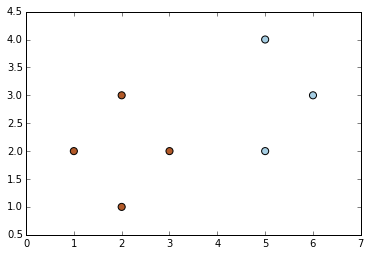

In [13]:
plot_problem(seven_X, seven_y)

In [14]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(seven_X, seven_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

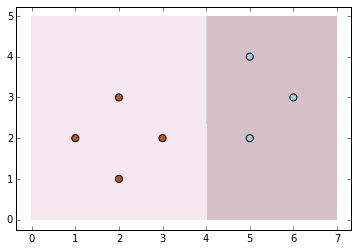

In [15]:
plot_problem(seven_X, seven_y, svc.predict)

In [31]:
svc.predict(sp.array([1, 1]))

array([1])

In [32]:
svc.predict(sp.array([6, 1]))

array([-1])

In [33]:
svc.predict(sp.array([3.5, 2]))

array([1])

In [29]:
svc.decision_function(seven_X)

array([[ 1.99980469],
       [ 1.99921875],
       [ 2.99921875],
       [ 0.99980469],
       [-0.99960937],
       [-1.00019531],
       [-1.99960938]])

In [18]:
svc.support_

array([4, 5, 3], dtype=int32)

In [19]:
svc.dual_coef_

array([[  4.99707031e-01,   1.46484375e-04,  -4.99853516e-01]])

In [20]:
svc.support_vectors_

array([[ 5.,  2.],
       [ 5.,  4.],
       [ 3.,  2.]])

#### Rekonstrukcija primarnog problema

* Nakon što je model naučen, možemo rekonstruirati primarne varijable, odnosno težine $\mathbf{w}$ i $w_0$


* Težine $\mathbf{w}$:
$$
\begin{align}
\mathbf{w} &= \sum_{i=1}^N \alpha_i y^{(i)}\mathbf{x}^{(i)}
\end{align}
$$


* Pomak $w_0$: za potporne vektore $\mathbf{x}^{(i)}\in S$ vrijedi

$$
\begin{align*}
y^{(i)} h(\mathbf{x}) &= 1\\ 
y^{(i)} \Big(\sum_{j\in S} \alpha_j y^{(j)}(\mathbf{x}^{(i)})^\intercal\mathbf{x}^{(j)} + w_0\Big) &= y^{(i)} y^{(i)}\\
w_0 &= y^{(i)} - \sum_{j\in S} \alpha_j y^{(j)}(\mathbf{x}^{(i)})^\intercal\mathbf{x}^{(j)}\\
\end{align*}
$$


* $w_0$ možemo izračunati na temelju jednog primjera $\mathbf{x}^{(i)}$. Međutim, radi numeričke stabilnosti, bolje je uprosječiti izračun nad svim potpornim vektorima:


$$
w_0 = \frac{1}{|S|}\sum_{i\in S} \Big( y^{(i)} - \sum_{j\in S} \alpha_j y^{(j)}(\mathbf{x}^{(i)})^\intercal\mathbf{x}^{(j)}\Big)
$$


In [21]:
def w0(X, y, dc, sv) :
    s = 0
    for i in sv :
        r = 0
        for alpha,j in zip(dc,sv) :
            r += -alpha*sp.dot(X[i],X[j])
        s += y[i] - r
    return s / float(len(sv))

In [22]:
w0(seven_X, seven_y, svc.dual_coef_[0], svc.support_)

3.9995117187499982

In [23]:
svc.intercept_

array([ 3.99951172])

In [34]:
svc.coef_

array([[ -9.99707031e-01,  -2.92968750e-04]])

In [25]:
def h_primal(x, w, w0):
    return sp.dot(w,x)+ w0
def h_dual(x, X, y, dc, sv):
    return sum([ -alpha * sp.dot(x,X[i]) for alpha,i in zip(dc, sv)]) + w0(X, y, dc, sv)

In [26]:
svc.decision_function(seven_X)

array([[ 1.99980469],
       [ 1.99921875],
       [ 2.99921875],
       [ 0.99980469],
       [-0.99960937],
       [-1.00019531],
       [-1.99960938]])

In [27]:
map(lambda x : h_primal(x,svc.coef_,svc.intercept_),seven_X)

[array([ 1.99980469]),
 array([ 1.99921875]),
 array([ 2.99921875]),
 array([ 0.99980469]),
 array([-0.99960938]),
 array([-1.00019531]),
 array([-1.99960938])]

In [28]:
map(lambda x : h_dual(x,seven_X,seven_y,svc.dual_coef_[0],svc.support_),seven_X)

[1.9998046874999988,
 1.9992187499999989,
 2.999218749999998,
 0.99980468749999929,
 -0.99960937500000036,
 -1.0001953124999989,
 -1.9996093750000021]

#### Je li ovo jedini način za treniranje SVM-a?

* Nije. Umjesto Lagrangeovih multiplikatora, mogli smo problem kvadratnog programiranja riješiti na neki drugi način


* Također, mogli smo ostati na primarnom problemu, i riješiti ga npr. stohastičkim gradijentnim spustom uz penalizaciju (algoritam *Pegasos*)


* Postoji niz SVM solvera 
  * https://cseweb.ucsd.edu/~akmenon/ResearchExam.pdf
  * https://mitpress.mit.edu/sites/default/files/titles/content/9780262026253_sch_0001.pdf
  

* Međutim, prednost dualne formulacije je da omogućava **jezgreni trik**

# Meka margina

# Sažetak

* Logistička regresija je **diskriminativan klasifikacijski model** s probabilističkim izlazom
  
  
* Koristi se **logistička funkcija gubitka** odnosno **pogreška unakrsne entropije**


* Optimizacija se provodi **gradijentnim spustom**, a prenaučenost se može spriječiti **regularizacijom**


* Model **odgovara generativnom modelu** s normalno distribuiranim izglednostima i dijeljenom kovarijacijskom matricom, ali je broj parametara logističke regresije manji 


* Logistička regresija vrlo je dobar algoritam koji **nema        nedostatke** koje imaju klasifikacija regresijom i perceptron


In [6]:
def plot_problem(X, y, h=None, surfaces=True) :
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision boundaries (surfaces=False) or decision surfaces (surfaces=True)
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.02  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if shape(Z_test) == () :
                # h returns a scalar when applied to a matrix; map explicitly
                Z = sp.array(map(h,XX))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = sp.array(map(h,XX))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        if surfaces :
            plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)
        else :
            plt.contour(xx, yy, Z)
    # Plot the dataset
    scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.Paired,marker='o',s=50);